In [3]:
import pandas as pd

import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

from nltk.stem import WordNetLemmatizer


# download nltk corpus (first time only)
#nltk.download('all')



In [36]:
# Load the dataset
df = pd.read_csv("data/ESG_daily_news.csv", index_col=None)

In [37]:
#fill NaN with empty string
df = df.fillna('')

In [38]:
# create preprocess_text function
def preprocess_text(text):

    # Tokenize the text

    tokens = word_tokenize(text)




    # Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]




    # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]




    # Join the tokens back into a string

    processed_text = ' '.join(lemmatized_tokens)

    return processed_text

# apply the function df

df['text'] = df['text'].apply(preprocess_text)

In [39]:
# initialize NLTK sentiment analyzer

analyzer = SentimentIntensityAnalyzer()


# create get_sentiment function

def get_sentiment(text):

    scores = analyzer.polarity_scores(text)

    sentiment = 1 if scores['pos'] > 0 else 0

    return sentiment




# apply get_sentiment function

df['sentiment'] = df['text'].apply(get_sentiment)
#negative sentiments are 0, positive are 1
df.loc[df['sentiment']==0]

,Date,headline,text,sentiment
12,2022-11-10,Funds Seen Lagging Behind Broader Markets in 2023,The debate whether investing ESG principle min...,0
115,2022-08-02,California Water Prices Climb to Record Amid D...,California water price all-time high severe dr...,0
128,2022-07-24,Hitachi Construction's Value-Chain Sales May E...,,0
145,2022-07-08,The Electric Car Market is About to Get Crazy,The early day new technology tend — put techni...,0
158,2022-06-29,Stellantis Says EV Market Is at Risk Unless Co...,"Unless electric vehicle get cheaper , “ market...",0
171,2022-06-21,"Tesla Layoffs Violated Federal Law, Suit Says",Tesla Inc. sued former employee claim company ...,0
211,2022-05-05,Global Sustainable Debt Sales Fall to Eight-Mo...,Global sustainable debt sale fell eight-month ...,0
269,2022-02-13,Oil Volatility Jumps as Ukraine Tensions Jolt ...,Oil market another erratic week tension ratche...,0
301,2021-12-21,Hedge Funds Seek Legal Advice for ‘Onerous’ Rule,An obscure rule covering ESG investing Europe ...,0
302,2021-12-20,WalMart Sued for Allegedly Dumping Hazardous W...,Walmart sued California allegedly dumping haza...,0


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
docs = df['text'].apply(nlp)
ents = []
idx = 0
for doc in docs:
    for ent in doc.ents:
        ents.append([ent.text, ent.label_,idx])
    idx += 1
orgs = []
for a,b,c in ents:
    if b == 'ORG': orgs.append([a,df['sentiment'][c]])
orgs_df = pd.DataFrame(orgs, columns=["org","sentiment"])
print(orgs_df)

[['Meta Platforms', 1], ['Liontrust GF Tortoise Fund', 1], ['Meta', 1], ['MSCI USA ETFSeparately', 1], ['Meta Platforms', 1], ['DWS Group', 1], ['Deutsche Bank', 1], ['Hoops', 1], ['DWS', 1], ['Goldman Sachs', 1], ['ESG', 1], ['SEC', 1], ['Deutsche bank DWS', 1], ['Intelligence', 1], ['JPMorgan Chase & Co.', 1], ['Deutsche Bank AG', 1], ['JPMorgan', 1], ['2013Deutsche Bank', 1], ['EpsteinThe', 1], ['Challenger , Gray & ChristmasThe', 1], ['Hewlett-Packard', 1], ['Amazon.com', 1], ['HP', 1], ['Amundi Deutsche Bank ’ DWS Group', 1], ['ESG fund', 1], ['EU', 1], ['ESG', 1], ['EU', 1], ['ESG', 1], ['EU', 1], ['ESG', 1], ['EU', 1], ['EU', 1], ['BlackRock', 1], ['Axa Investment Management', 1], ['COP27', 1], ['ESG', 1], ['Public Power Corp.', 1], ['ESG', 1], ['Meta Platforms', 1], ['Amazon.com', 1], ['Apple', 1], ['Netflix Google', 1], ['ESG', 1], ['MSCI World Information Technology Index', 1], ['Amazon', 1], ['Terminal', 1], ['EV', 1], ['Challenger , Gray & ChristmasJob', 1], ['Amazon.com', 

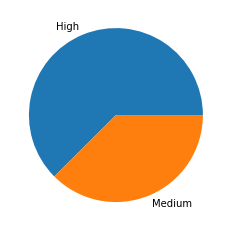

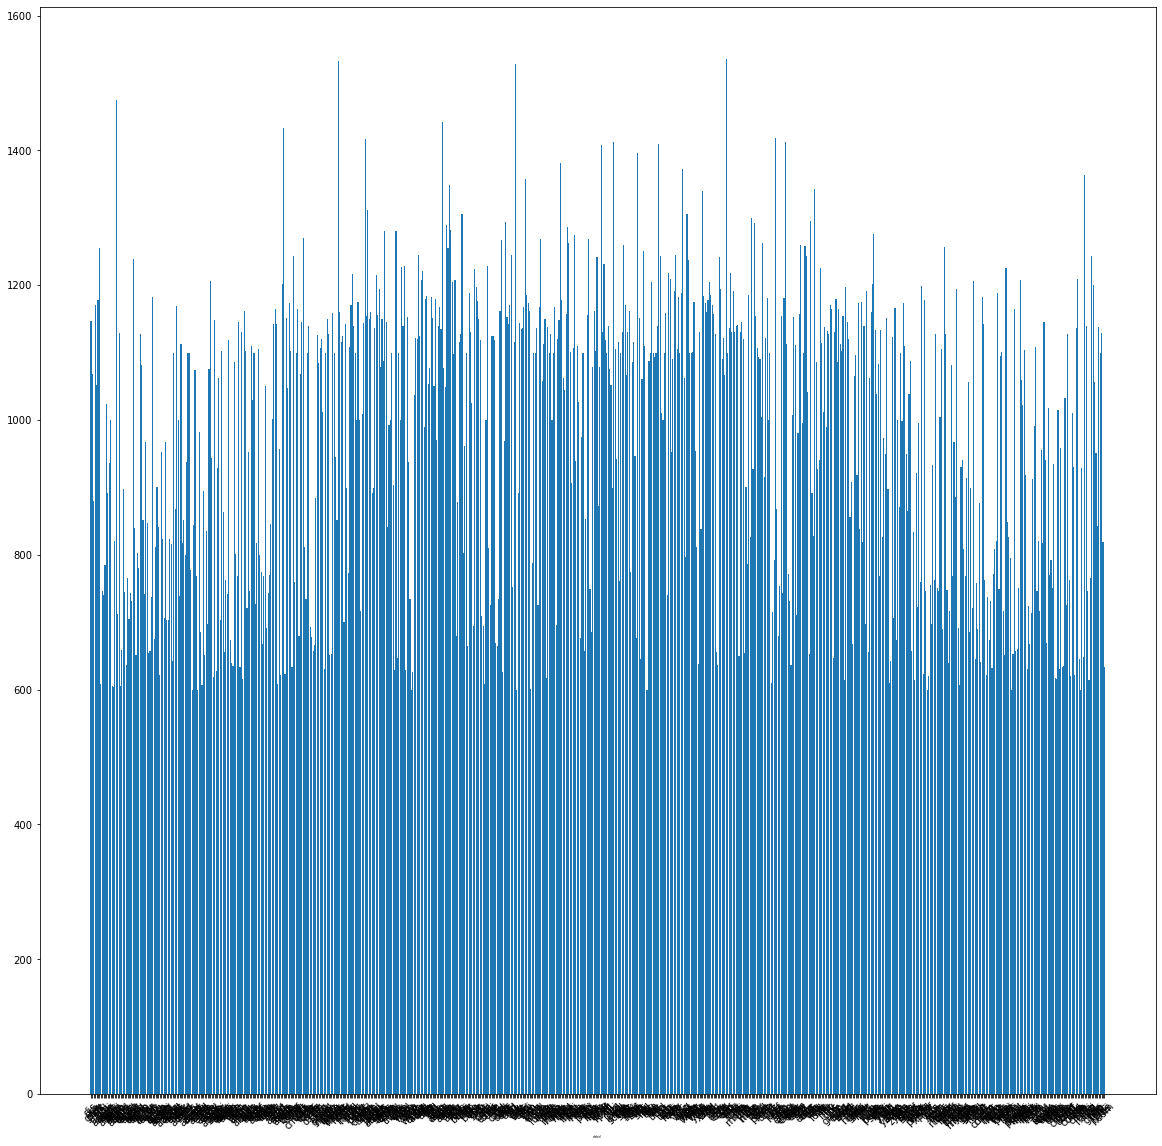

In [58]:
## Visualizations
import pandas as pd
import matplotlib.pyplot as plt
# Load the amazon review dataset
df2 = pd.read_csv("data/publiccompanyesgratings.csv")
group_by = df2.groupby("total_level").count().reset_index()
sizes = group_by['ticker']
labels = group_by['total_level']

plt.pie(sizes, labels = labels)
plt.show()
x = df2["ticker"]
y = df2["total_score"]
#ax = df['ESG Risk Level'].value_counts().plot(kind='bar', figsize=(14,8))
# setting the size of the figure
fig = plt.figure(figsize=(20,20))
#ax = df['Total ESG Risk score'].value_counts().plot(kind='bar', figsize=(14,8))
plt.xticks(rotation=45)
plt.xlabel('xlabel', fontsize=3)
plt.bar(x, y)
plt.show()

In [61]:
#Commonalities between News CSV and ratings csv
common = list(set(orgs_df['org']) & set(df2['name']))
print(pd.concat([
    orgs_df[orgs_df.org.isin(common)],
    df2[df2.name.isin(common)]]))

                          org  sentiment ticker                     name  \
85             Morgan Stanley        1.0    NaN                      NaN   
149   Goldman Sachs Group Inc        1.0    NaN                      NaN   
267            Morgan Stanley        1.0    NaN                      NaN   
381            Morgan Stanley        1.0    NaN                      NaN   
902            Morgan Stanley        1.0    NaN                      NaN   
1131           Morgan Stanley        1.0    NaN                      NaN   
1185           Morgan Stanley        1.0    NaN                      NaN   
306                       NaN        NaN     gs  Goldman Sachs Group Inc   
335                       NaN        NaN     ms           Morgan Stanley   

     currency                       exchange            industry  \
85        NaN                            NaN                 NaN   
149       NaN                            NaN                 NaN   
267       NaN                      